In [436]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

# used chatGPT

In [437]:
testperson = 20

In [438]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Muhammad_20.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.279564,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
1,0.289748,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
2,0.300728,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
3,0.311782,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
4,0.323778,0,1,NaN,NaN,NaN,15.651641,65.015533,659.987915,NaN,...,NaN,2.349976,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
5,0.335737,1,1,-49.291977,66.018852,658.420227,15.651641,65.015533,659.987915,0.608068,...,2.453339,2.349976,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
6,0.346387,1,1,-49.208069,66.004959,658.340698,15.651641,65.015533,659.987915,0.607900,...,2.992325,2.349976,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
7,0.358632,1,1,-49.188812,65.988838,658.288452,15.846313,64.790344,659.714417,0.607867,...,3.043533,3.288940,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
8,0.369317,1,1,-49.121552,65.937202,658.391968,15.887942,64.748474,659.993225,0.607707,...,3.360031,3.484848,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
9,0.380282,1,1,-49.037861,65.835190,658.446899,15.917009,64.672905,659.986389,0.607521,...,3.540985,3.449600,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive


In [439]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(144533, 39)

In [440]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P10_text.txt', 'AI_HC_P10_MCQ.txt', 'AI_HC_P10_FIBQ.txt',
       'OR_HC_P10_text.txt', 'OR_HC_P10_MCQ.txt', 'OR_HC_P10_FIBQ.txt',
       'AI_SK_P10_text.txt', 'AI_SK_P10_MCQ.txt', 'AI_SK_P10_FIBQ.txt',
       'OR_SK_P10_text.txt', 'OR_SK_P10_MCQ.txt', 'OR_SK_P10_FIBQ.txt',
       'AI_KB_P10_text.txt', 'AI_KB_P10_MCQ.txt', 'AI_KB_P10_FIBQ.txt',
       'OR_KB_P10_text.txt', 'OR_KB_P10_MCQ.txt', 'OR_KB_P10_FIBQ.txt'],
      dtype=object)

In [441]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
#im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
#im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 

im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
#im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-126.038010,85.347221,545.158691,-64.345665,92.062584,557.033752,0.829484,...,3.038269,3.463898,True,OR_SK_P10_text.txt,10.0,20.0,Times New Roman,SK,False,Immersive
1,0.010054,1,1,-126.057152,85.343437,545.107971,-64.374886,92.054008,556.989624,0.829565,...,3.049103,3.462631,True,OR_SK_P10_text.txt,10.0,20.0,Times New Roman,SK,False,Immersive
2,0.020684,1,1,-126.057152,85.343437,545.107971,-64.384438,92.057526,557.027405,0.829565,...,3.049103,3.463867,True,OR_SK_P10_text.txt,10.0,20.0,Times New Roman,SK,False,Immersive
3,0.033173,1,1,-126.124748,85.371834,545.234985,-64.440018,92.063133,557.135620,0.829664,...,3.047943,3.467789,True,OR_SK_P10_text.txt,10.0,20.0,Times New Roman,SK,False,Immersive
4,0.043070,1,1,-126.202248,85.398056,545.476746,-64.488098,92.082016,557.364441,0.829721,...,3.041626,3.471909,True,OR_SK_P10_text.txt,10.0,20.0,Times New Roman,SK,False,Immersive


In [442]:
left_x =im_SK_AI['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_AI['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_AI['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_AI['right_gaze_point_on_display_area_y']*1440
t = im_SK_AI['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1118.647842,1086.577988,329.141893,321.574459
1,0.011965,1123.585892,1088.237152,335.508792,319.674897
2,0.022937,1112.384567,1077.646484,339.088726,326.566093
3,0.033908,1107.968979,1069.981995,328.773315,330.849473
4,0.043908,1097.286530,1062.044067,321.434083,336.718040
...,...,...,...,...,...
7838,102.412695,607.904434,607.986450,668.960223,682.452207
7839,102.424440,607.415428,609.542618,670.023794,680.891891
7840,102.435475,607.705956,610.838242,673.520579,680.098300
7841,102.445937,608.231277,613.693199,673.937201,678.697329


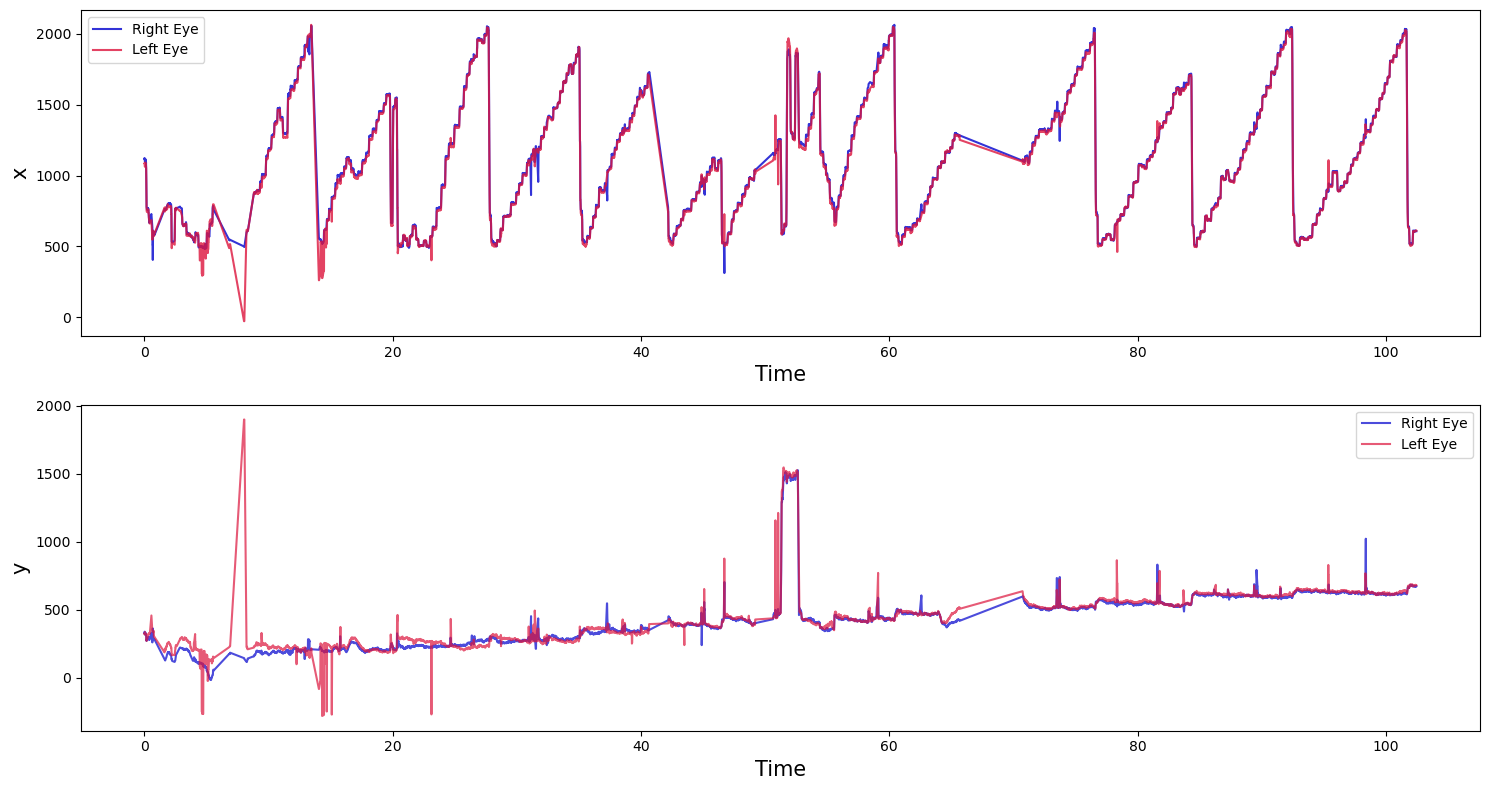

In [443]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [444]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [445]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [446]:
imerserive_parts = [im_HC_AI ,
#im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR 
]

In [447]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1043.364563,1017.496185,284.552507,402.594037
1,0.010583,1050.312119,1015.458450,308.985436,332.473819
2,0.021753,1049.548187,1018.115234,299.120636,327.734442
3,0.032753,1055.189056,1020.281448,298.506238,326.235452
4,0.043631,1051.548157,1019.492722,282.213986,327.763045
...,...,...,...,...,...
380,4.306854,890.189590,878.547440,456.339240,501.296368
381,4.318563,899.527664,882.767029,460.700684,499.791327
382,4.330315,899.363556,888.880234,458.651905,502.390366
383,4.340084,899.343643,889.626999,458.733830,502.620006


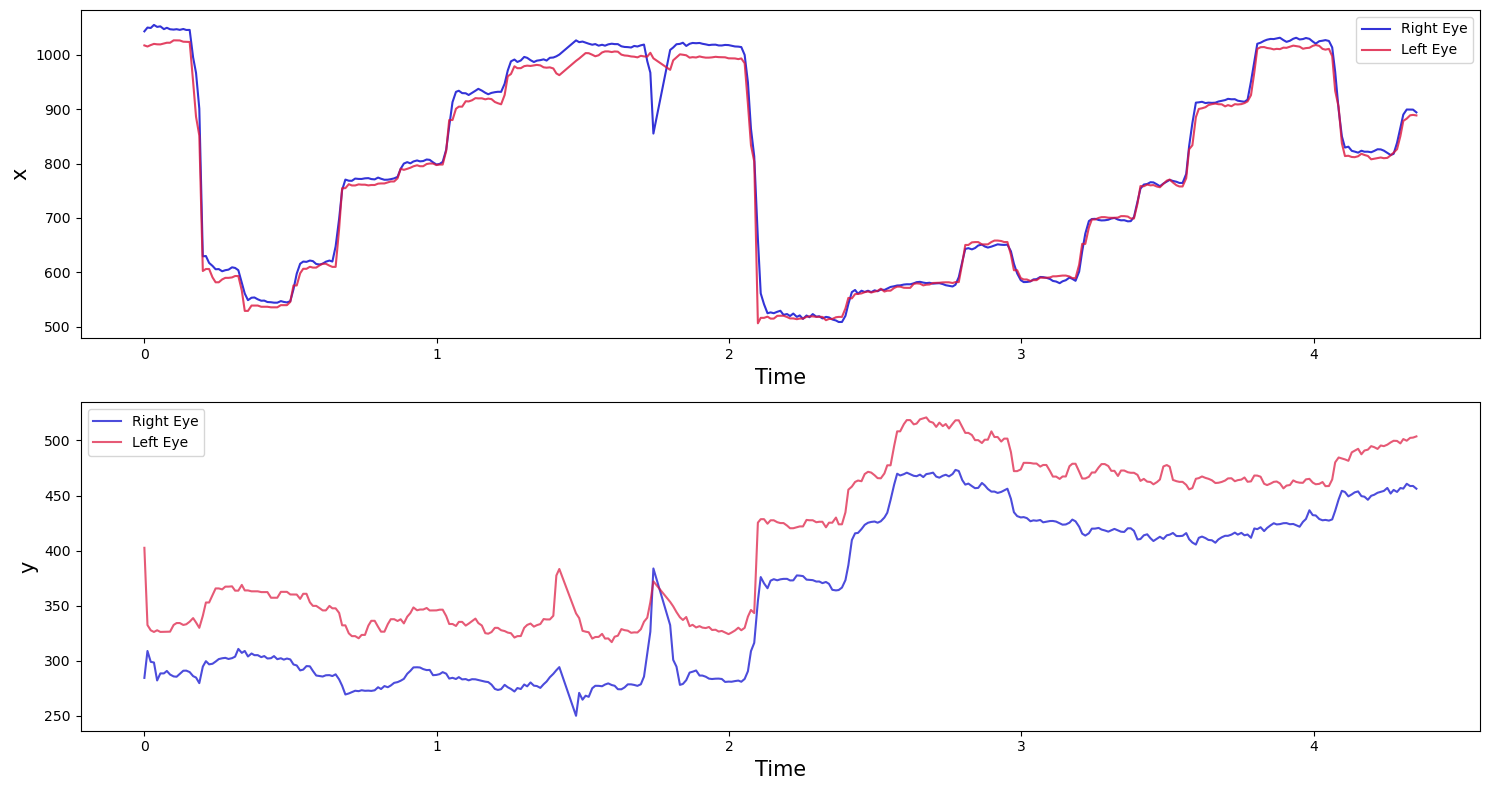

In [448]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


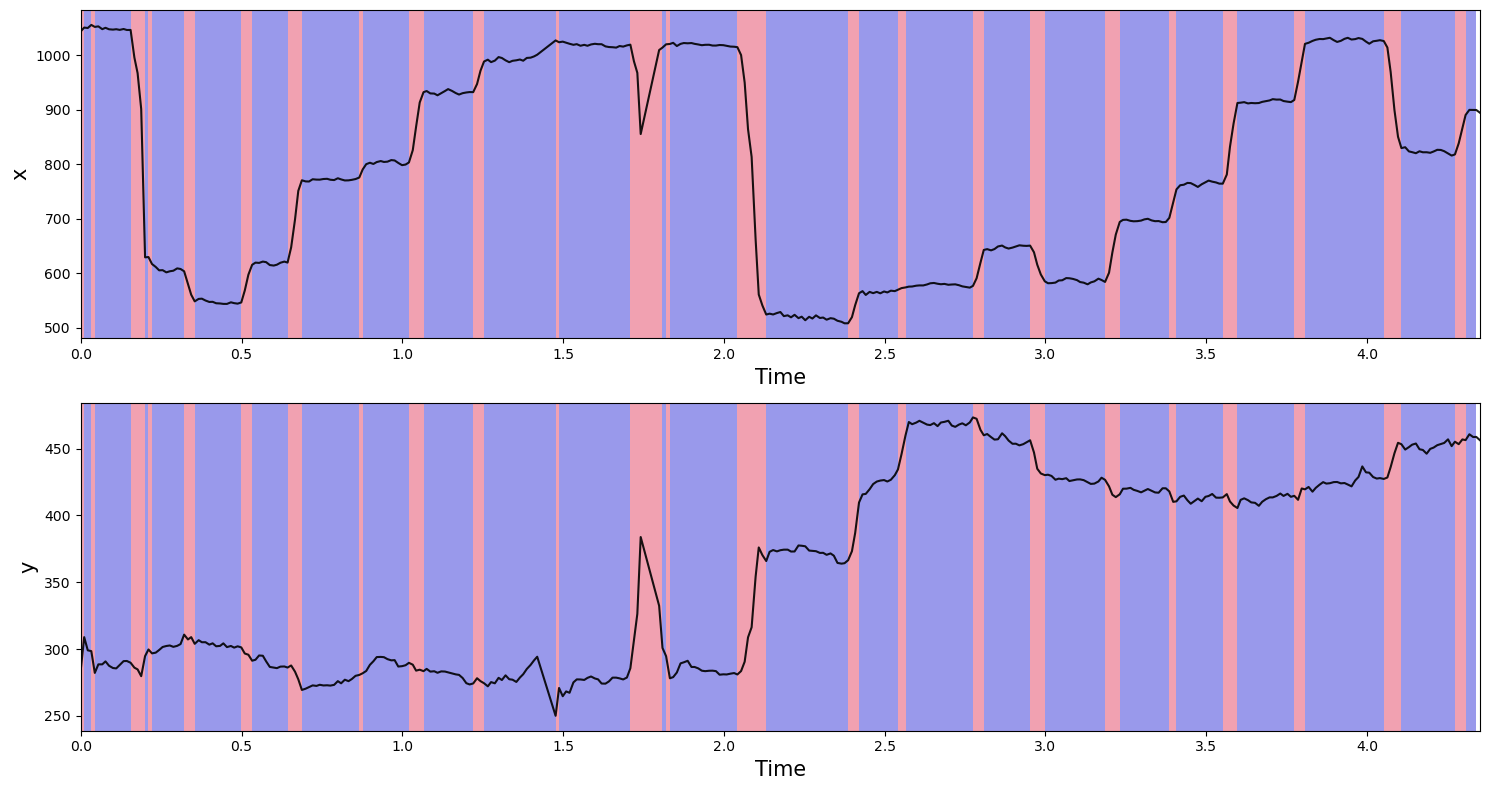

In [449]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [450]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [451]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-36.411968,62.588448,569.189758,26.600719,77.362305,571.528809,0.592344,...,3.136490,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Skimming,1
1,0.011973,1,1,-36.411968,62.588448,569.189758,26.630104,77.271545,571.540161,0.592344,...,3.145477,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Skimming,1
2,0.022945,1,1,-36.384258,62.505119,569.213867,26.643595,77.202682,571.548889,0.592274,...,3.145508,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Skimming,0
3,0.033915,1,1,-36.366291,62.447926,569.225525,26.634548,77.180176,571.551575,0.592229,...,3.127762,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Skimming,1
4,0.044911,1,1,-36.366291,62.447926,569.225525,26.658245,77.183113,571.668457,0.592229,...,3.134232,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,13.018164,1,1,-10.268500,75.052177,580.465881,54.441277,77.375153,578.057312,0.526062,...,2.906952,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Skimming,0
871,13.027943,1,1,-10.524319,75.046768,580.657837,54.203037,77.455261,578.255920,0.526681,...,2.931641,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Skimming,0
872,13.039841,1,1,-10.803083,75.003456,581.093689,53.946415,77.501900,578.833801,0.527348,...,2.940765,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Skimming,0
873,13.051244,1,1,-12.144447,74.631119,579.840393,52.406914,77.555740,577.712097,0.530704,...,2.937347,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Skimming,1


In [452]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [453]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-49.291977,66.018852,658.420227,15.651641,65.015533,659.987915,0.608068,...,2.349976,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive,0
1,0.010650,1,1,-49.208069,66.004959,658.340698,15.651641,65.015533,659.987915,0.607900,...,2.349976,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive,0
2,0.022895,1,1,-49.188812,65.988838,658.288452,15.846313,64.790344,659.714417,0.607867,...,3.288940,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive,0
3,0.033580,1,1,-49.121552,65.937202,658.391968,15.887942,64.748474,659.993225,0.607707,...,3.484848,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive,0
4,0.044545,1,1,-49.037861,65.835190,658.446899,15.917009,64.672905,659.986389,0.607521,...,3.449600,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6887,84.014937,1,1,-51.722572,70.861267,620.218506,11.711503,63.980980,621.554749,0.619900,...,3.021469,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive,1
6888,84.026373,1,1,-51.997604,70.778999,619.988892,11.260586,63.874851,621.208801,0.620578,...,3.019760,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive,1
6889,84.037339,1,1,-52.310604,70.675545,619.611511,11.260586,63.874851,621.208801,0.621372,...,3.019760,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive,1
6890,84.048100,1,1,-52.632889,70.593361,619.250671,10.817899,63.812946,620.743164,0.622184,...,3.019806,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive,1


In [454]:
colunms_to_drop = ['Reading', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [455]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [456]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")